На сегодняшнем семинаре будем говорить про кластеризацию и про визуализацию.
Также поговорим про метрики качества кластеризации.

Из методов кластеризации рассмотрим:
* k-means
* DBSCAN

Визуализацию будем делать с помощью:
* PCA
* t-SNE

Ноутбук частично основан на ноутбуке
https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_russian/topic07_unsupervised/lesson7_part3_kmeans.ipynb

# Кластеризация

Сгенерируем точки из трех кластеров

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +
<ipython-input-1-c2ef1d83f42f>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[...,0], X[...,1], s=50, cmap='viridis')


Text(0, 0.5, 'y')

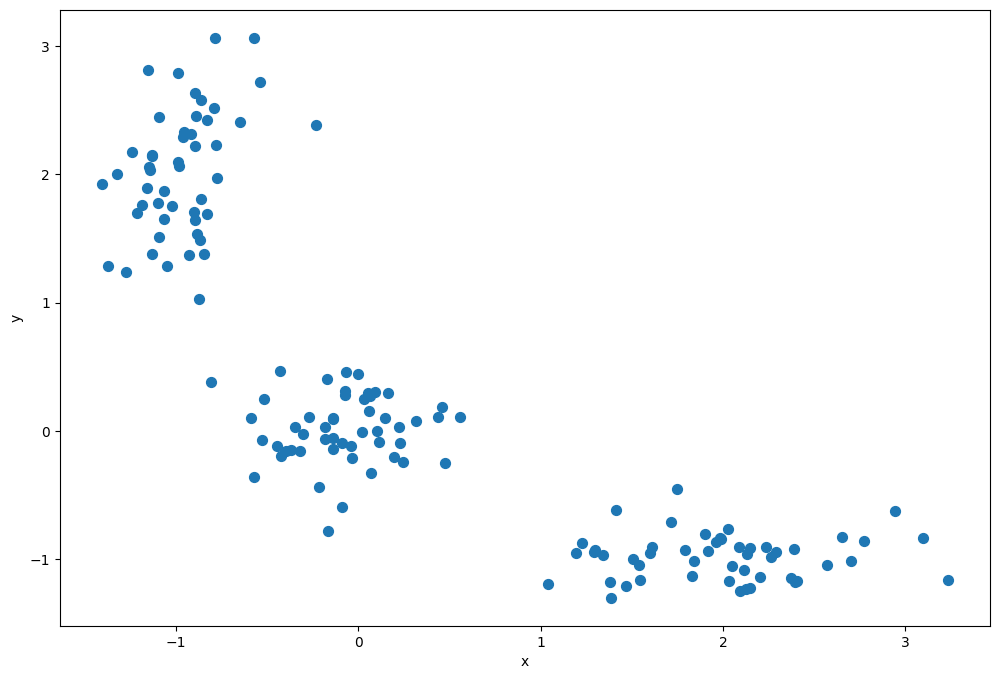

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pylab as plt
%pylab inline

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(12,8))
plt.scatter(X[...,0], X[...,1], s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

Применим kmeans

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'y')

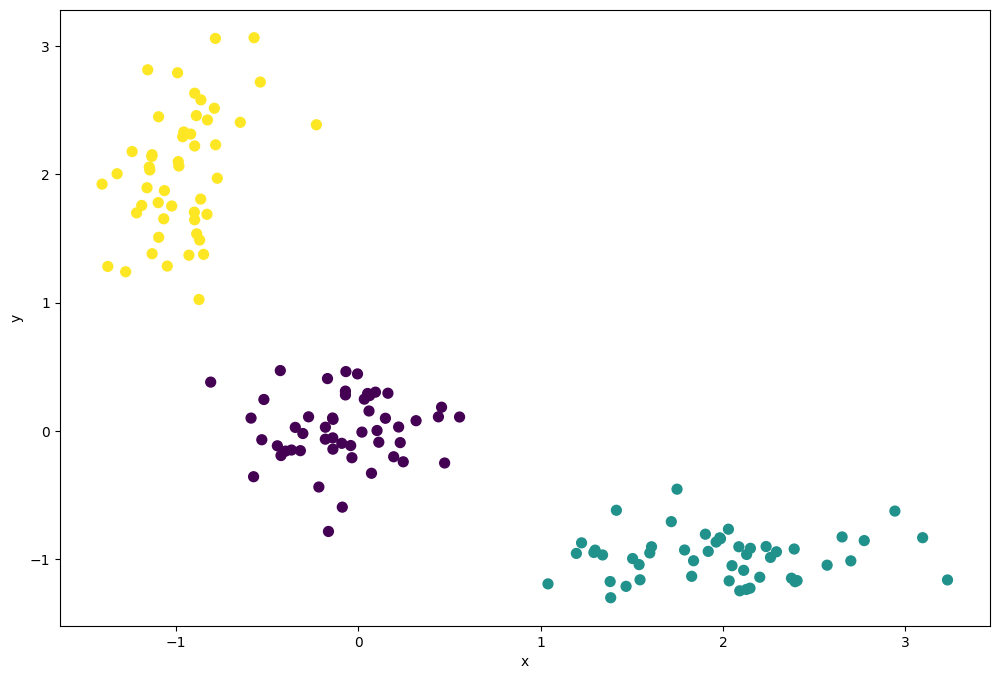

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)
print(kmeans.labels_) #список из номеров кластеров для каждого объекта обучающей выборки

plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

Применим иерархическую кластеризацию.

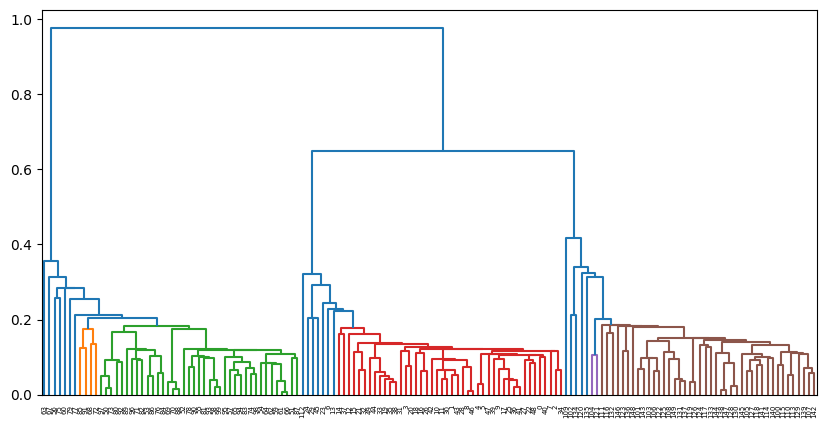

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.2)

Что произойдет, если подобрать неверное число кластеров?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

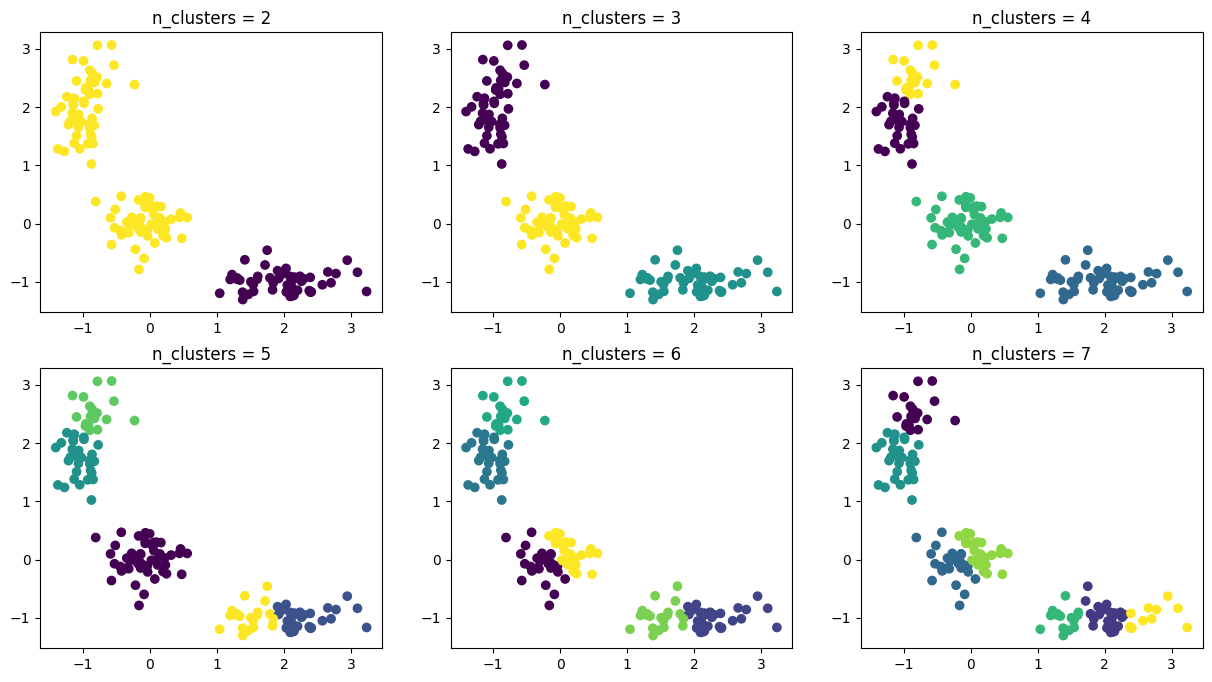

In [ ]:
plt.figure(figsize= (15,8))
for n_c in range(2,8):
    kmeans = KMeans(n_clusters = n_c)
    kmeans = kmeans.fit(X)
    clusters = kmeans.predict(X)
    plt.subplot(2,3,n_c - 1)
    plt.scatter(X[:,0], X[:,1], c = clusters)
    plt.title('n_clusters = {}'.format(n_c))

plt.show()

## DBSCAN

(Density-based spatial clustering of applications with noise)

Это алгоритм, основанный на плотности — если дан набор объектов в некотором пространстве, алгоритм группирует вместе объекты, которые расположены близко и помечает как выбросы объекты, которые находятся в областях с малой плотностью (ближайшие соседи которых лежат далеко).

Алгоритм имеет два основных гиперпараметра:
1. `eps` &mdash; радиус рассматриваемой окрестности
2. `min_samples` &mdash; число соседей в окрестности

Для выполнения кластеризации DBSCAN точки делятся на основные точки, достижимые по плотности точки и выпадающие следующим образом:

- Точка $p$ является основной точкой, если по меньшей мере `min_samples` точек находятся на расстоянии, не превосходящем
`eps` от неё. Говорят, что эти точки достижимы прямо из $p$.

-  Точка $q$ прямо достижима из $p$, если точка $q$ находится на расстоянии, не большем `eps`, от точки $p$, и $p$ — основная точка.
Точка $q$ достижима из $p$, если имеется путь
$p_1,…,p_n$ где $p_1=p$ и $p_n=q$ , а каждая точка $p_{i+1}$ достижима прямо из $p_i$ (все точки на пути должны быть основными, за исключением $q$).

Все точки, не достижимые из основных точек, считаются выбросами.

Теперь, если $p$ является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимыми из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.



Рассмотрим диаграмму, параметр `min_samples`=4.

Точка $A$ и другие красные точки являются основными точками, поскольку область с радиусом
`eps` , окружающая эти точки, содержит по меньшей мере 4 точки (включая саму точку). Поскольку все они достижимы друг из друга, точки образуют один кластер. Точки $B$ и $C$ основными не являются, но достижимы из $A$ (через другие основные точки), и также принадлежат кластеру. Точка $N$ является точкой шума, она не является ни основной точкой, ни доступной прямо.

<p><a href="https://commons.wikimedia.org/wiki/File:DBSCAN-Illustration.svg#/media/Файл:DBSCAN-Illustration.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/1200px-DBSCAN-Illustration.svg.png" alt="DBSCAN-Illustration.svg" width="450" height="450"> </a><br>Автор: <a href="//commons.wikimedia.org/wiki/User:Chire" title="User:Chire">Chire</a> &mdash; <span class="int-own-work" lang="ru">собственная работа</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>

Посмотрим на результаты кластеризации при разном выборе параметров `eps` и `min_samples`.

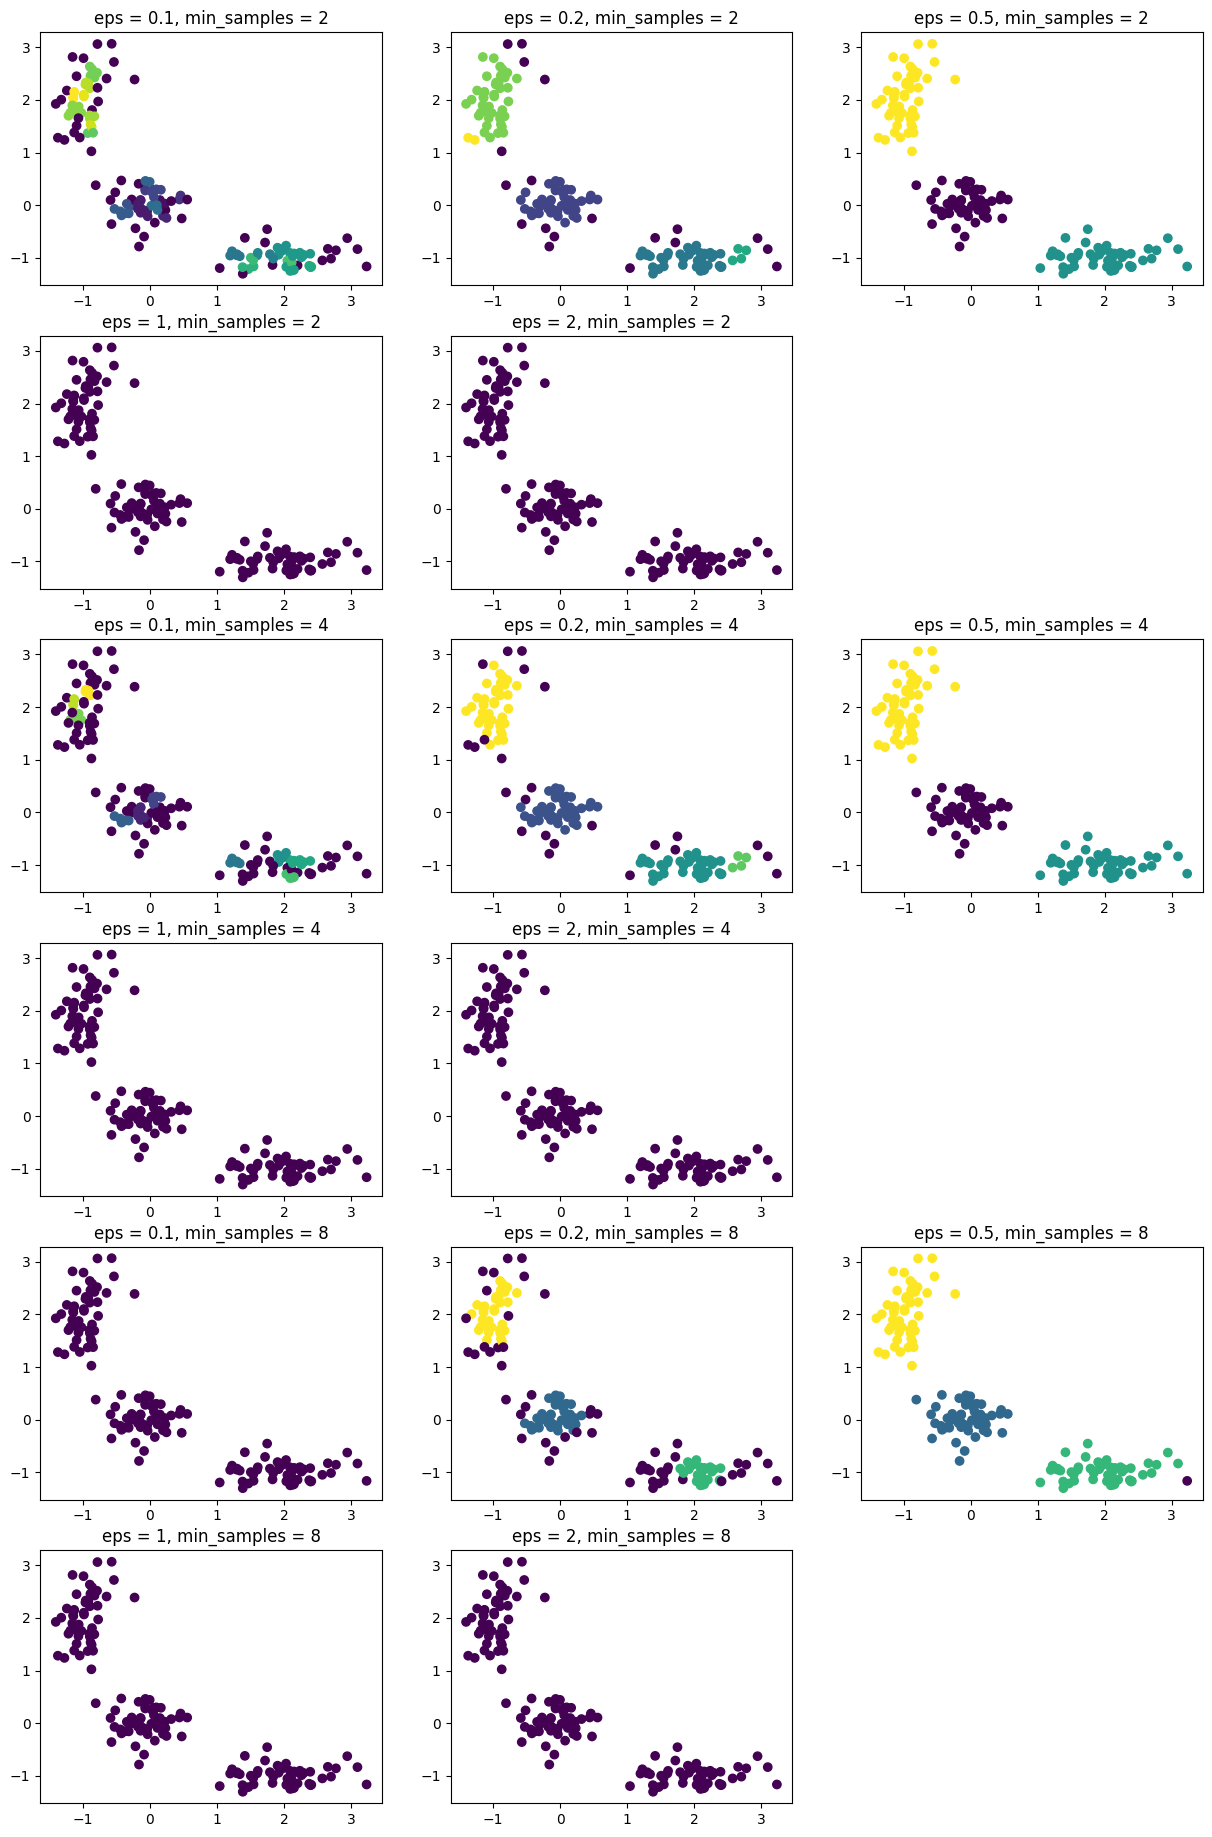

In [ ]:
from sklearn.cluster import DBSCAN

plt.figure(figsize= (15,23))
i = 1
for samples in [2, 4, 8]:
    for e in [0.1, 0.2, 0.5, 1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(6, 3, i)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()

[Визуализация работы DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

### Пример: кластеризация игроков NBA

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

nba = pd.read_csv("nba_2019.csv")
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Alex Abrines\abrinal01,SG,25,OKC,31,2,588,56,157,...,0.923,5,43,48,20,17,6,14,53,165
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,0,123,4,18,...,0.700,3,22,25,8,1,4,4,24,17
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,428,38,110,...,0.778,11,49,60,65,14,5,28,45,108
3,4,Steven Adams\adamsst01,C,25,OKC,80,80,2669,481,809,...,0.500,391,369,760,124,117,76,135,204,1108
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,28,1913,280,486,...,0.735,165,432,597,184,71,65,121,203,729


In [ ]:
nba.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

Применим kmeans с 5ю кластерами только к числовым столбцам (объявим алгоритм и обучим его с помощью метода fit).

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

numeric_cols = nba._get_numeric_data().dropna(axis=1)

kmeans = KMeans(n_clusters=5, random_state=3)
kmeans.fit(numeric_cols)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=3)

Визуализируем данные с помощью метода главных компонент с n_components = 2:

    1) Применим метод главных компонент
    
    2) Нарисуем полученные точки на плоскости, раскрашенные в цвета, соответствующие кластерам (см. пример выше)

Text(0, 0.5, 'y')

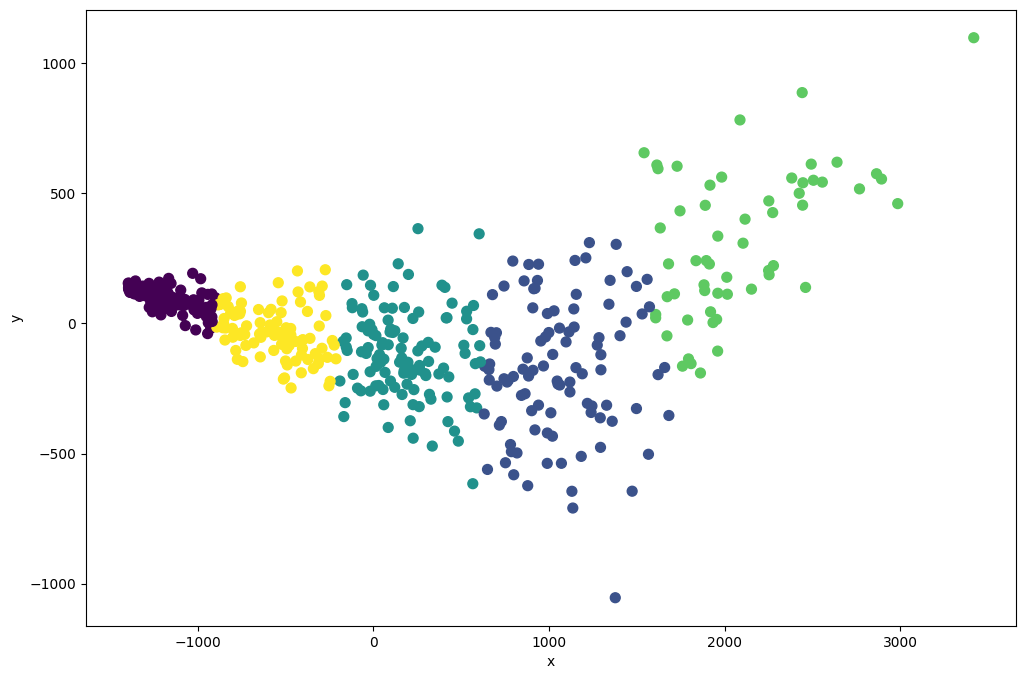

In [ ]:
pca = PCA(n_components=2)
res = pca.fit_transform(numeric_cols)

plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

Посмотрим, какое смысловое значение несут кластеры.

1) Визуализируем точки в осях nba['pts'] (total points) и nba['ast'] (total assistances) и раскрасим их в цвета кластеров.

2) Визуализируем точки в осях nba['age'] (age) и nba['mp'] (minutes played) и раскрасим их в цвета кластеров.

Подпишем оси.

Text(0, 0.5, 'assistances')

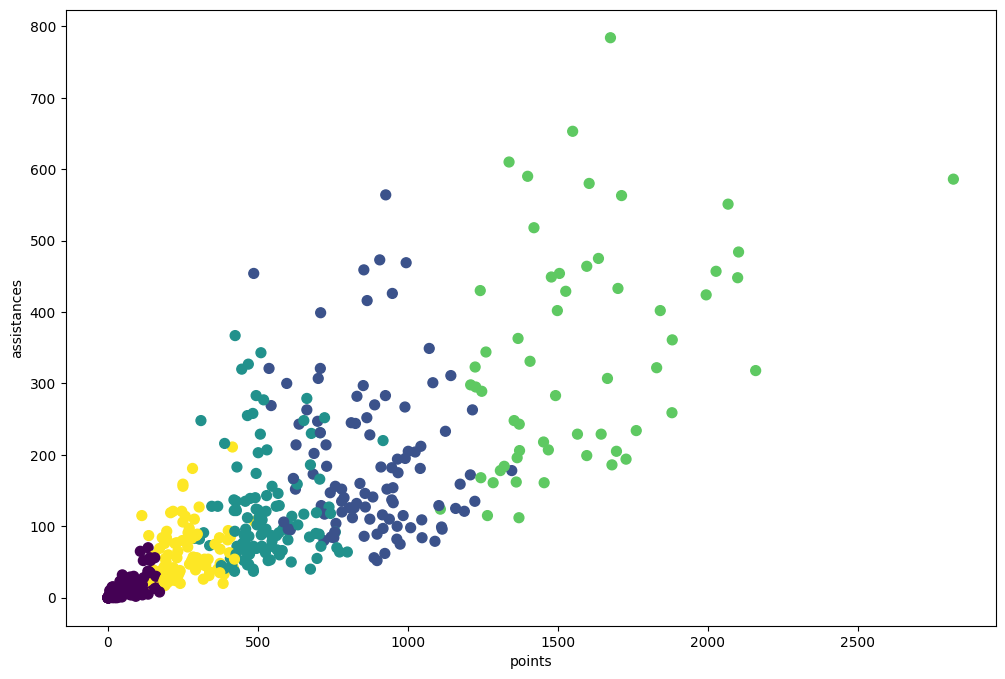

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(nba['PTS'], nba['AST'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('points')
plt.ylabel('assistances')

Text(0, 0.5, 'minutes played')

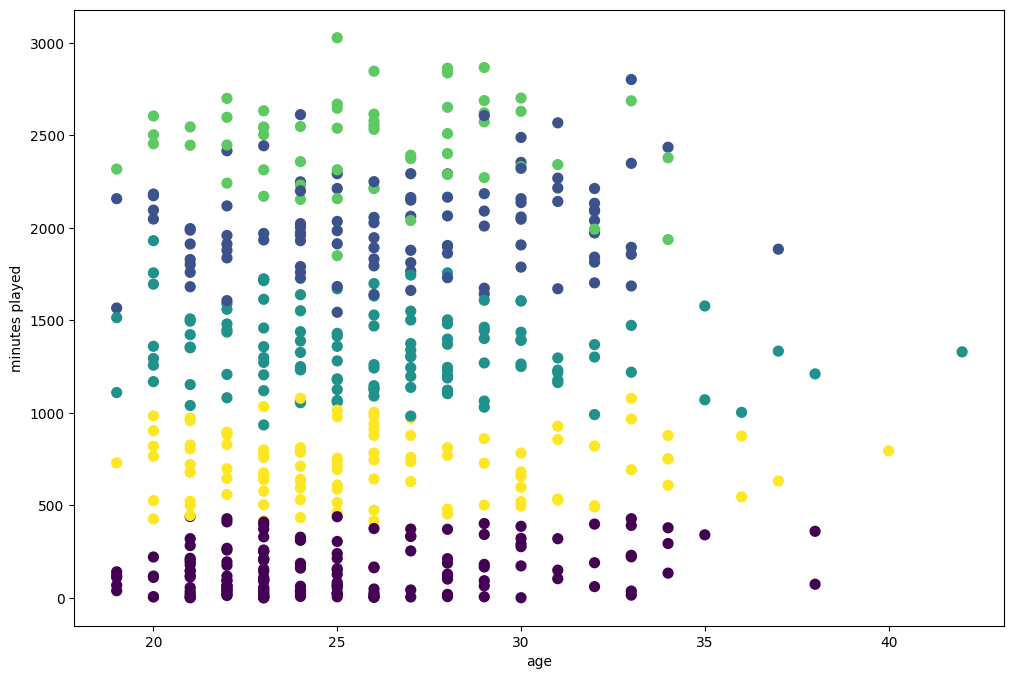

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(nba['Age'], nba['MP'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('age')
plt.ylabel('minutes played')

### Инициализация центроидов

Метод `sklearn.KMeans` содержит параметры `n_init` (число запусков из различных начальных приближений) и `init`. Есть три способа инициализации центроидов:
- `k-means++` – "умная" инициализация центроидов для ускорения сходимости.
- `random` – случайная инициализация центроидов.
- `ndarray` – заданная инициализация центроидов.

## Сжатие изображений с K-means

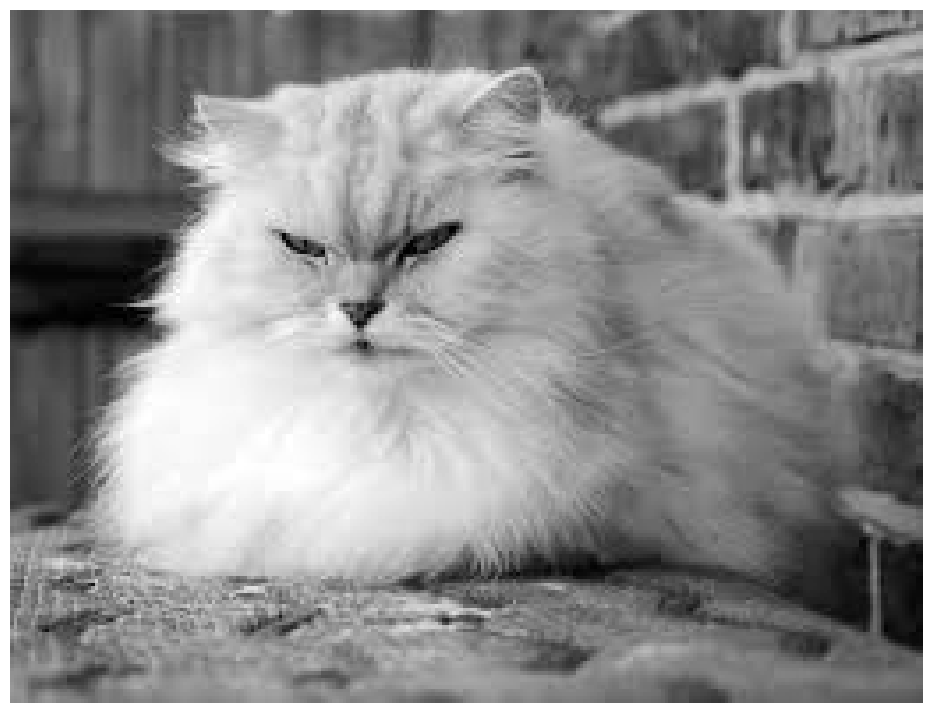

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('cat.jpg')[..., 1]
plt.figure(figsize = (15, 9))
plt.axis('off')
plt.imshow(img, cmap='gray');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


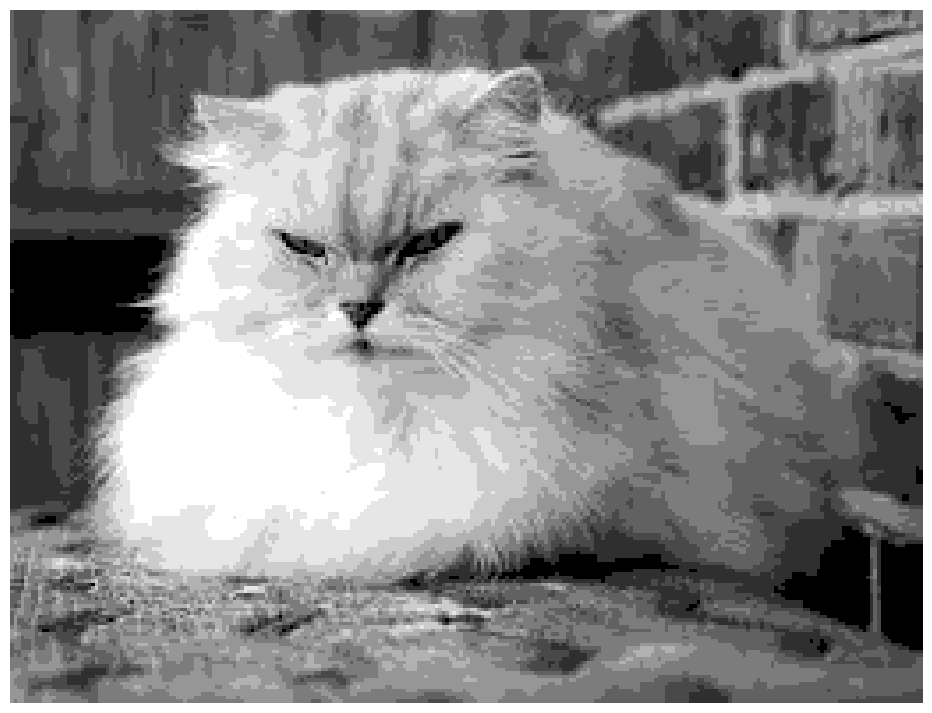

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from scipy.stats import randint

X = img.reshape((-1, 1)) #вытягиваем картинку в вектор
k_means = MiniBatchKMeans(n_clusters=10)
k_means.fit(X)
values = k_means.cluster_centers_
labels = k_means.labels_

img_compressed = values[labels].reshape(img.shape) #возвращаем к размерности исходной картинки

plt.figure(figsize = (15, 9))
plt.axis('off')
plt.imshow(img_compressed, cmap = 'gray');

Возьмите любую фотографию (можно работать с той же) и подберите минимальное число кластеров, которое визуально не ухудшает качество изображения.

In [ ]:
#your code here

# Нахождение тем в текстах

**Применим KMeans для кластеризации текстов из 4 новостных категорий.**

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from time import time

categories = [
    'talk.politics.misc',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

Loading 20 newsgroups dataset for categories:
['talk.politics.misc', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3363 documents
4 categories


**Закодируем тексты с помощью TF-IDF признаков.**

![How](tf-idf.png)

In [ ]:
print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
n_samples: 3363, n_features: 1000


**И применим к получившимся векторам метод $k$ средних и выведем метрики качества кластеризации.**

In [ ]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Clustering sparse data with KMeans(max_iter=100, n_clusters=4, n_init=1)
Homogeneity: 0.488
Completeness: 0.587
V-measure: 0.533
Adjusted Rand-Index: 0.474
Adjusted mutual info score: 0.532
Silhouette Coefficient: 0.018


**Выведем слова, соответствующие самым весомым компонентам центров кластеров.**

In [ ]:
terms = vectorizer.get_feature_names_out()  # get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 1: henry toronto zoo spencer zoology space launch work orbit umd
Cluster 2: graphics university thanks image posting file ac host nntp com
Cluster 3: com people god don just cramer think like know government
Cluster 4: space nasa access gov digex pat alaska shuttle moon com


## Кластеризация рукописных цифр

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target
Im = digits.images

Выведем на экран первые 20 цифр (в цветовой схеме 'gray')

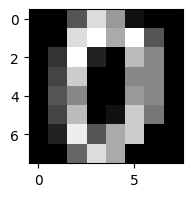

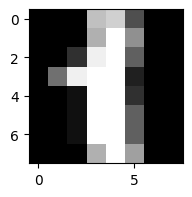

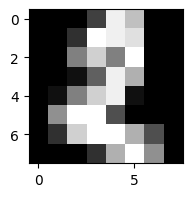

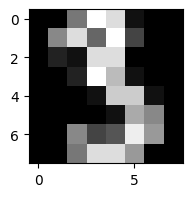

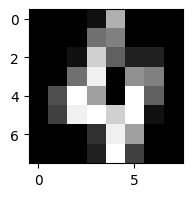

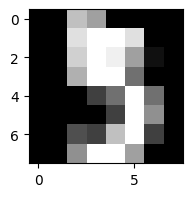

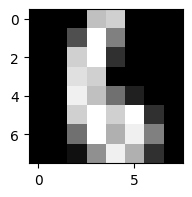

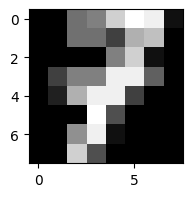

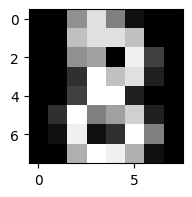

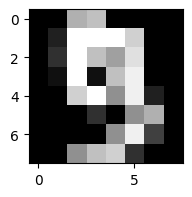

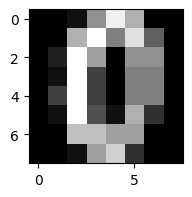

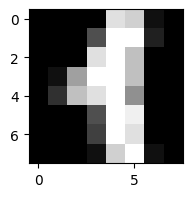

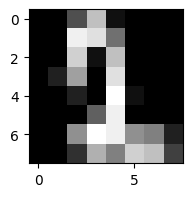

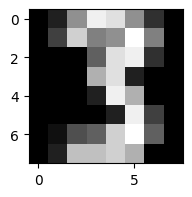

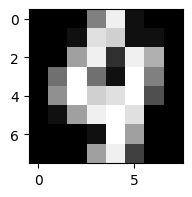

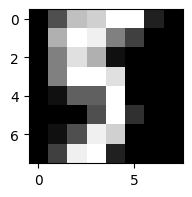

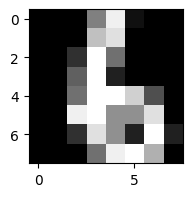

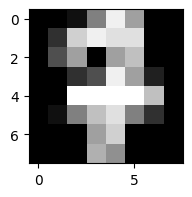

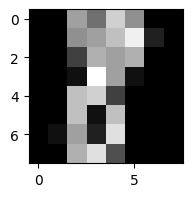

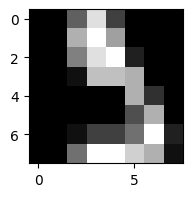

In [ ]:
for i in range(20):
    plt.figure(figsize=(2,2))
    plt.imshow(Im[i], cmap='gray')
    plt.show()

Обучим kmeans с десятью кластерами.

In [ ]:
km = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1)
km.fit(X)

KMeans(max_iter=100, n_clusters=10, n_init=1)

Выведем на экран метрики качества кластеризации

In [ ]:
labels = digits.target

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Homogeneity: 0.709
Completeness: 0.720
V-measure: 0.715
Adjusted Rand-Index: 0.629
Adjusted mutual info score: 0.712
Silhouette Coefficient: 0.165


Нарисуем центры получившихся кластеров.

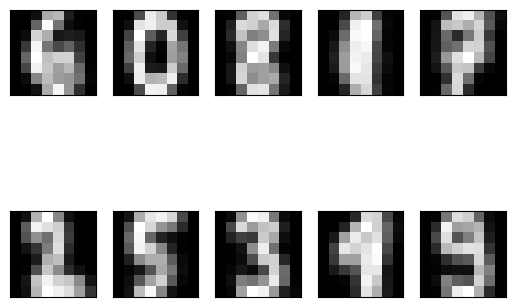

In [ ]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), km.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

Кластеризация получилась довольно качественной. Визуализируем наши объекты (изображения цифр) как точки на двумерной плоскости.

Визуализируем данные с помощью PCA с двумя компонентами:

1) объявим модель и обучим её (fit_transform)

2) нарисуем результат, покрасив точки в цвета, соответствующие кластерам

Projecting 64-dimensional data to 2D


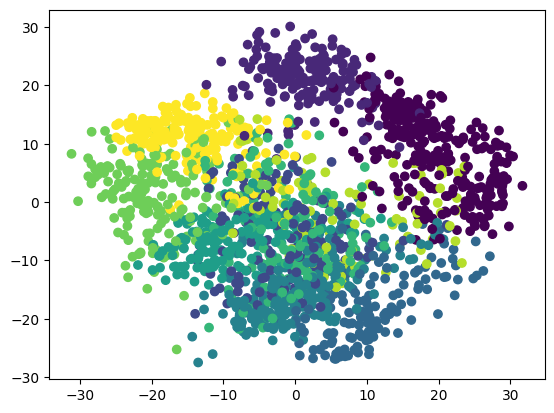

CPU times: user 297 ms, sys: 186 ms, total: 483 ms
Wall time: 320 ms


In [ ]:
%%time

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=km.labels_)
plt.show()

Визуализируем данные с помощью t-SNE

CPU times: user 25.2 s, sys: 147 ms, total: 25.3 s
Wall time: 14.9 s


<timed exec>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


Text(0.5, 1.0, 'MNIST. t-SNE projection')

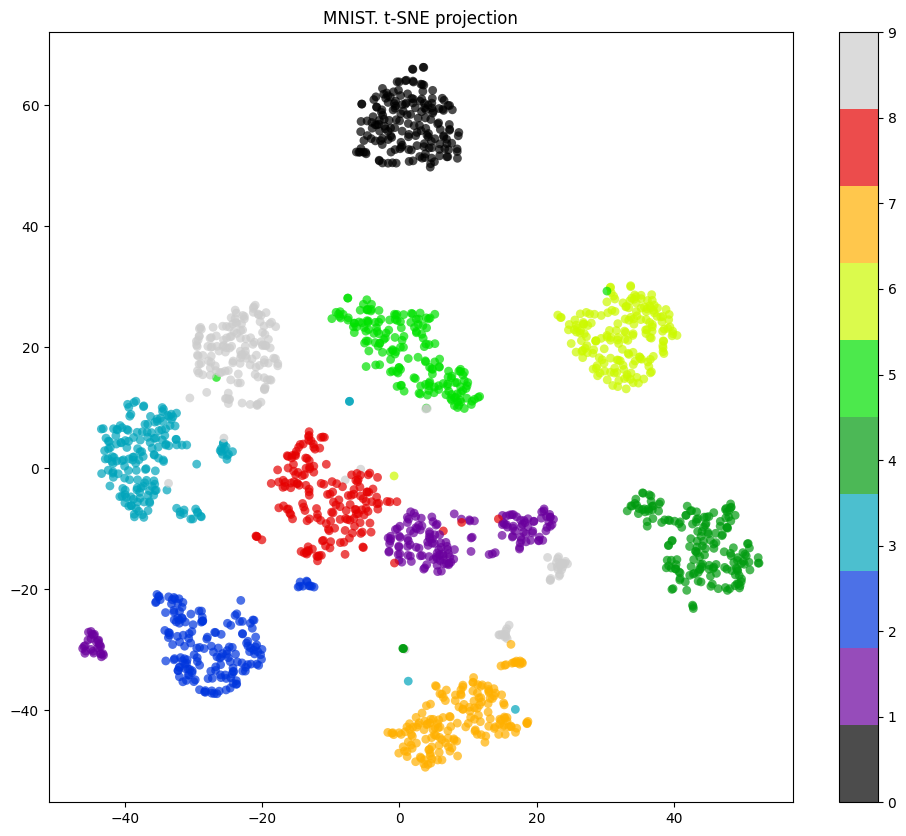

In [ ]:
%%time

from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X) # две координаты

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

## Полезные ссылки
- <a href="https://en.wikipedia.org/wiki/K-means_clustering">k-means</a> на Википедии
- <a href="https://scikit-learn.org/stable/modules/clustering.html">обзор</a> методов кластеризации в sklearn

# Если будет время попрактиковаться...

В этом задании мы попрактикуемся в методах снижения размерности и кластеризации данных.

Мы будем работать с набором данных Samsung Human Activity Recognition. Скачайте данные по ссылке https://github.com/juanlurg/samsung-human-activity. Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

In [ ]:
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [ ]:
X_train = np.loadtxt("../../data/samsung_HAR/samsung_train.txt")
y_train = np.loadtxt("../../data/samsung_HAR/samsung_train_labels.txt").astype(int)

X_test = np.loadtxt("../../data/samsung_HAR/samsung_test.txt")
y_test = np.loadtxt("../../data/samsung_HAR/samsung_test_labels.txt").astype(int)

Для кластеризации нам не нужен вектор ответов. Объедините обучающую и тестовую выборки.

In [ ]:
#your code here
X =
y =

In [ ]:
np.unique(y)

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

Отмасштабируйте выборку с помощью StandardScaler.

In [ ]:
#your code here
scaler =
X_scaled =

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

In [ ]:
#your code here
pca =
X_pca =

Визуализируйте данные в проекции на первые две главные компоненты.

In [ ]:
#your code here
plt.scatter(, , c=y, s=20, cmap='viridis');

Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов).

Параметры:

n_clusters = n_classes (число уникальных меток целевого класса)

n_init = 100

random_state = RANDOM_STATE (для воспроизводимости результата)

In [ ]:
#your code here

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

In [ ]:
#your code here

Выведите на экран значения метрик качества кластеризации

In [ ]:
#your code here

Теперь попробуем сделать кластеризацию с помощью AgglomerativeClustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [ ]:
ag = AgglomerativeClustering(n_clusters=n_classes,
                             linkage='ward').fit(X_pca)

Выведите метрики качества для полученного разбиения на кластеры. Сравните с kmeans. Запишите выводы!

In [ ]:
#your code here

Попробуйте применить другие методы кластеризации из sklearn. Также вычислите метрики качества и сделайте вывод о том, какой метод сработал лучше.

In [ ]:
#your code here